### Summary
Quick and dirty GDP growth comparisons between Brazil and other countries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

#pd.set_option('display.max_rows', 150)
#pd.set_option('display.min_rows', 65)
pd.set_option('display.max_columns', None)

In [2]:
df_base = pd.read_csv("..\DataSets\economicData_1960-2022_noNaN-drops.csv")


df_base = df_base[['Country Name', 'Index Year', 'GDP per capita (current USD)', 'Country Quintile']]
df_base.rename(columns={'GDP per capita (current USD)': 'GDP_perCapita'}, inplace=True)


# Calculating GDP per capita growth
df_base.sort_values(['Country Name', 'Index Year'], inplace=True)
df_base['GDP_perCapita_growth'] = df_base.groupby('Country Name')['GDP_perCapita'].pct_change()
df_base['GDP_perCapita_growth'].fillna(0, inplace=True)
#df_base['GDP_perCapita_growth'] = df_base['GDP_perCapita_growth'] * 100

# Removing both the first and last years (since they have no growth)
df_base = df_base[(df_base['Index Year'] > 1960) & (df_base['Index Year'] < 2022)]

# Defining GroupSets
We'll define groups to compare Brazil against:
- LatAm
- BRICS
- G20
- MidUpperIncome (3rd & 4th quintiles)


In [3]:
LatAm = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Dominican Republic",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Uruguay",
    "Venezuela"
]


BRICS = [
    "Brazil",
    "Russia",
    "India",
    "China",
    "South Africa"
]

G20 = [
    "Argentina",
    "Australia",
    "Brazil",
    "Canada",
    "China",
    "France",
    "Germany",
    "India",
    "Indonesia",
    "Italy",
    "Japan",
    "Mexico",
    "Russia",
    "Saudi Arabia",
    "South Africa",
    "South Korea",
    "Turkey",
    "United Kingdom",
    "United States"
]

# Calculate the mode (most common value) for 'Country Quintile' for each country
df_base['Country Quintile'] = df_base.groupby('Country Name')['Country Quintile']\
                                .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


# Selecting any country that appear in Q3 and Q4
MidUpperIncome = list(df_base[(df_base['Country Quintile'] == 'Q3')\
                              | (df_base['Country Quintile'] == 'Q4')]['Country Name'].unique())

# Ranking Brazil in each group

### Latin America

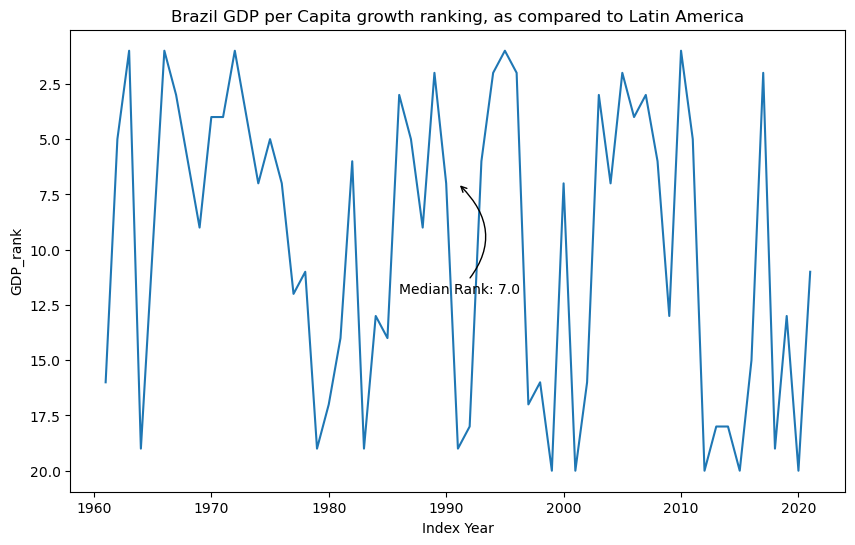

In [4]:
df_LatAM = df_base[df_base['Country Name'].isin(LatAm)].copy()


# Rank GDP_perCapita within each year
df_LatAM['GDP_rank'] = df_LatAM.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_LatAM[df_LatAM['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to Latin America')
plt.show()

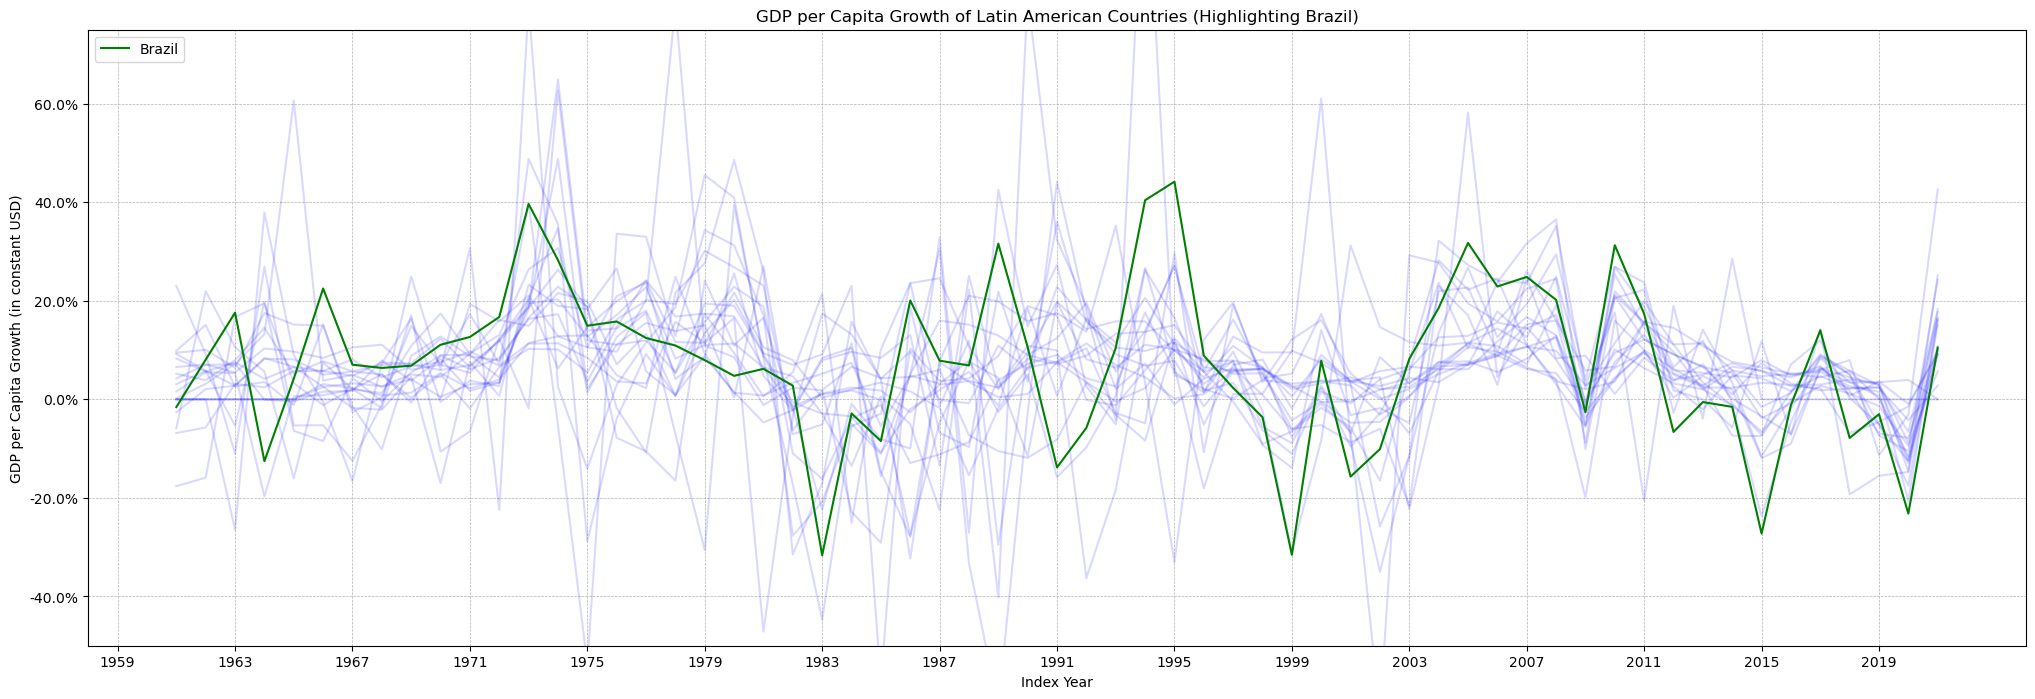

In [5]:
# Define a function to format y-axis ticks as percentages
def percentage_formatter(x, pos):
    return f"{100 * x:.1f}%"

plt.figure(figsize=(25, 8))

# Highlighting Brazil from other countries
df_LatAM['highlight'] = df_LatAM['Country Name'] == 'Brazil'


for country in df_LatAM['Country Name'].unique():
    if country != 'Brazil':
        sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_LatAM[df_LatAM['Country Name'] == country], 
                     color='blue', alpha=0.15, legend=False)

# Make Brazil's line more visible
sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_LatAM[df_LatAM['Country Name'] == 'Brazil'], 
             color='Green', label='Brazil')

# Setting the x-axis division to be every 4 years
start_year = df_LatAM['Index Year'].min()
end_year = df_LatAM['Index Year'].max()
plt.xticks(np.arange(start_year-2, end_year + 1, 4))


# Add percentage styling to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('GDP per Capita Growth of Latin American Countries (Highlighting Brazil)')
plt.ylabel('GDP per Capita Growth (in constant USD)')
plt.xlabel('Index Year')
plt.legend(loc='upper left')
plt.ylim(-0.50,0.75)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### BRICS

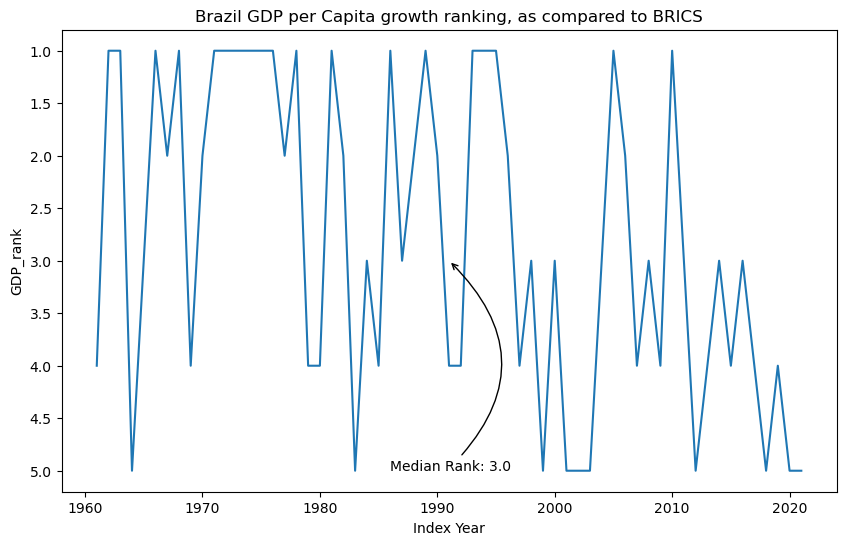

In [6]:
df_BRICS = df_base[df_base['Country Name'].isin(BRICS)].copy()


# Rank GDP_perCapita within each year
df_BRICS['GDP_rank'] = df_BRICS.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_BRICS[df_BRICS['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to BRICS')
plt.show()

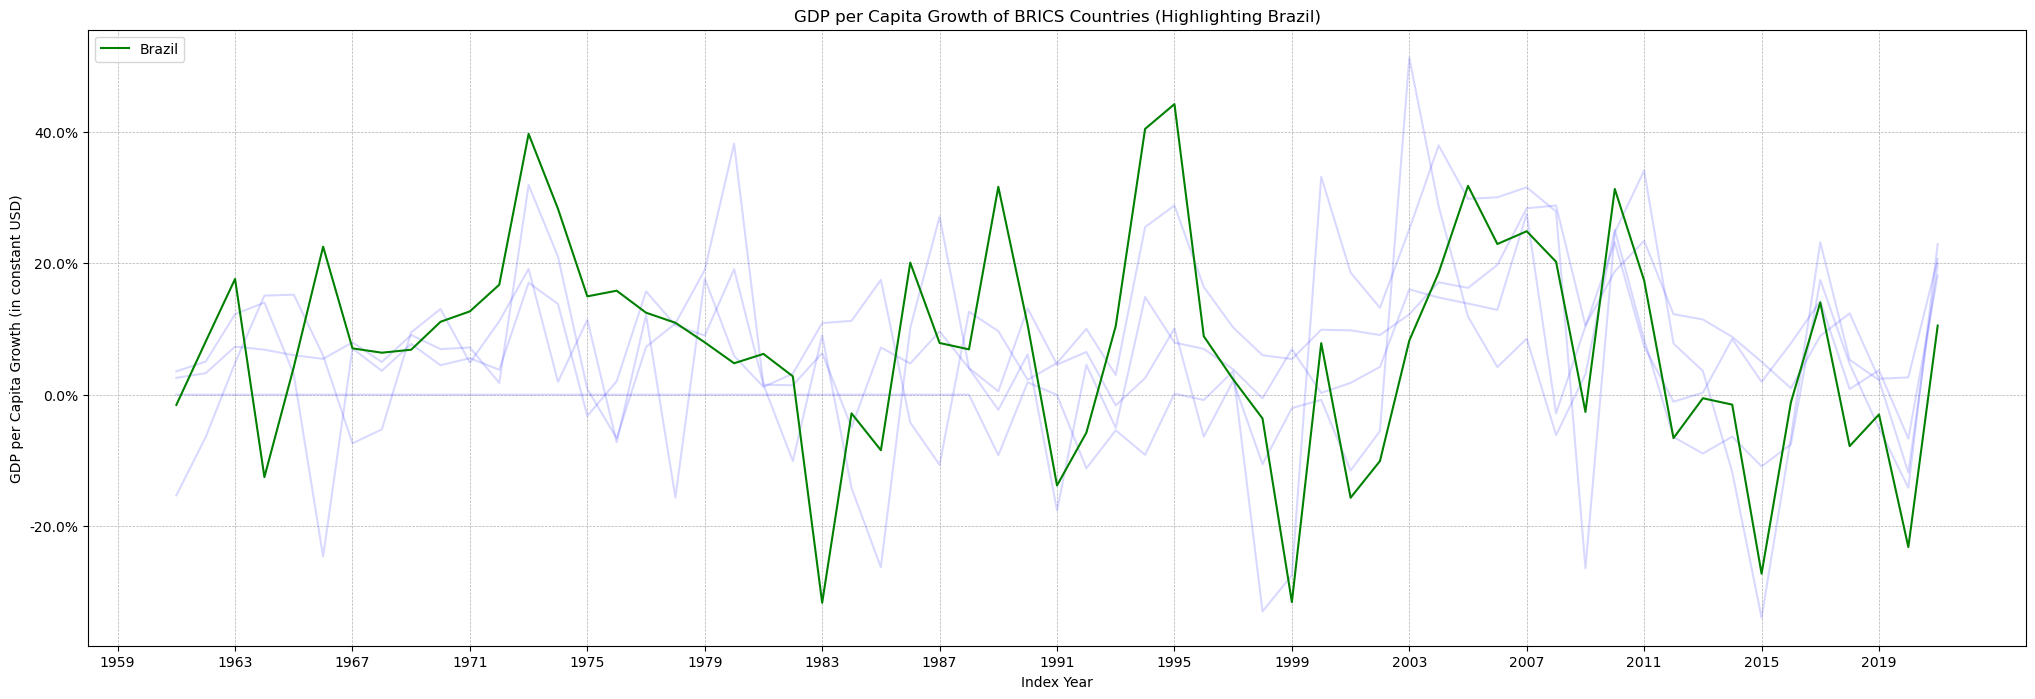

In [7]:
plt.figure(figsize=(25, 8))

# Highlighting Brazil from other countries
df_BRICS['highlight'] = df_BRICS['Country Name'] == 'Brazil'


for country in df_BRICS['Country Name'].unique():
    if country != 'Brazil':
        sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_BRICS[df_BRICS['Country Name'] == country], 
                     color='blue', alpha=0.15, legend=False)

# Make Brazil's line more visible
sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_BRICS[df_BRICS['Country Name'] == 'Brazil'], 
             color='Green', label='Brazil')

# Setting the x-axis division to be every 4 years
start_year = df_BRICS['Index Year'].min()
end_year = df_BRICS['Index Year'].max()
plt.xticks(np.arange(start_year-2, end_year + 1, 4))


# Add percentage styling to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('GDP per Capita Growth of BRICS Countries (Highlighting Brazil)')
plt.ylabel('GDP per Capita Growth (in constant USD)')
plt.xlabel('Index Year')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### G20

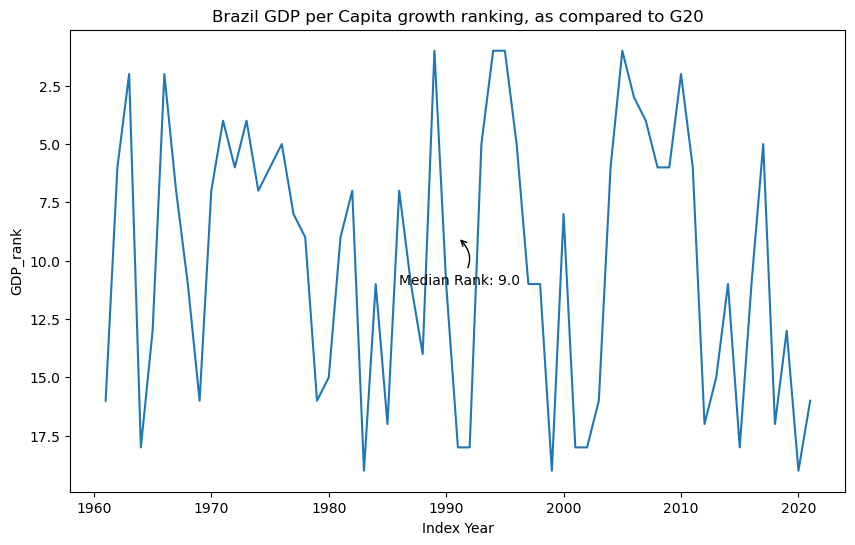

In [8]:
df_G20 = df_base[df_base['Country Name'].isin(G20)].copy()


# Rank GDP_perCapita within each year
df_G20['GDP_rank'] = df_G20.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_G20[df_G20['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to G20')
plt.show()

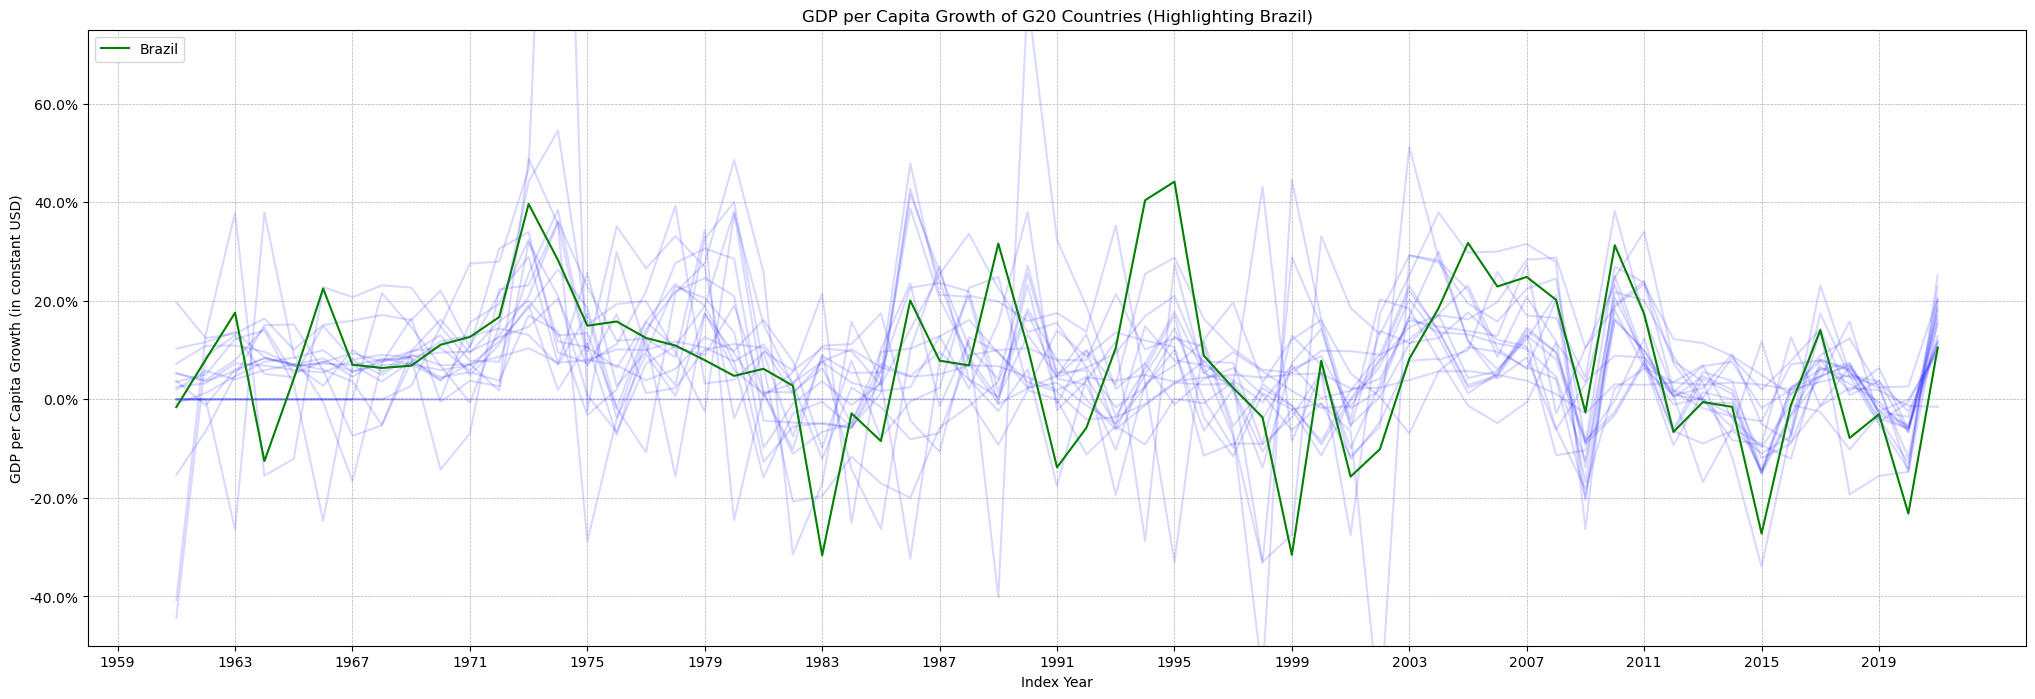

In [9]:
plt.figure(figsize=(25, 8))

# Highlighting Brazil from other countries
df_G20['highlight'] = df_G20['Country Name'] == 'Brazil'


for country in df_G20['Country Name'].unique():
    if country != 'Brazil':
        sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_G20[df_G20['Country Name'] == country], 
                     color='blue', alpha=0.15, legend=False)

# Make Brazil's line more visible
sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_G20[df_G20['Country Name'] == 'Brazil'], 
             color='Green', label='Brazil')

# Setting the x-axis division to be every 4 years
start_year = df_G20['Index Year'].min()
end_year = df_G20['Index Year'].max()
plt.xticks(np.arange(start_year-2, end_year + 1, 4))


# Add percentage styling to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('GDP per Capita Growth of G20 Countries (Highlighting Brazil)')
plt.ylabel('GDP per Capita Growth (in constant USD)')
plt.xlabel('Index Year')
plt.legend(loc='upper left')
plt.ylim(-0.50,0.75)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### Mid-Upper Income Countries

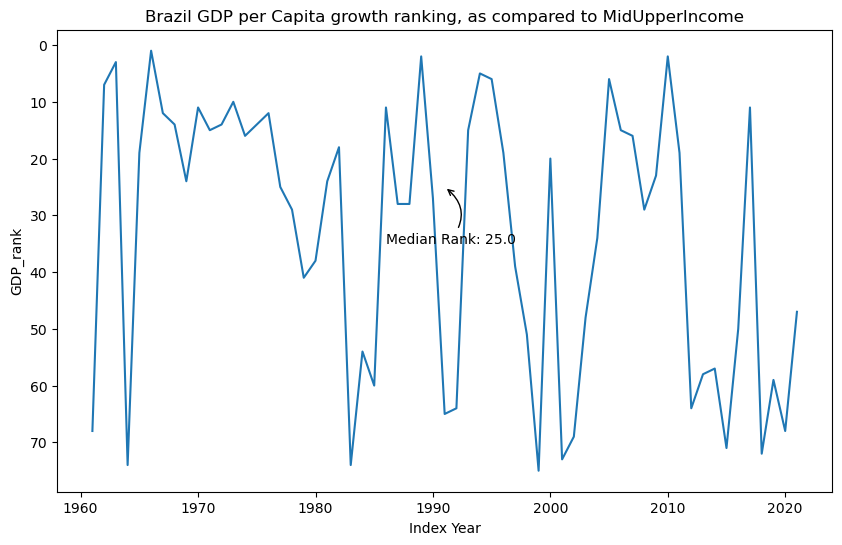

In [10]:
df_MidUpperIncome = df_base[df_base['Country Name'].isin(MidUpperIncome)].copy()


# Rank GDP_perCapita within each year
df_MidUpperIncome['GDP_rank'] = df_MidUpperIncome.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_MidUpperIncome[df_MidUpperIncome['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 10),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to MidUpperIncome')
plt.show()

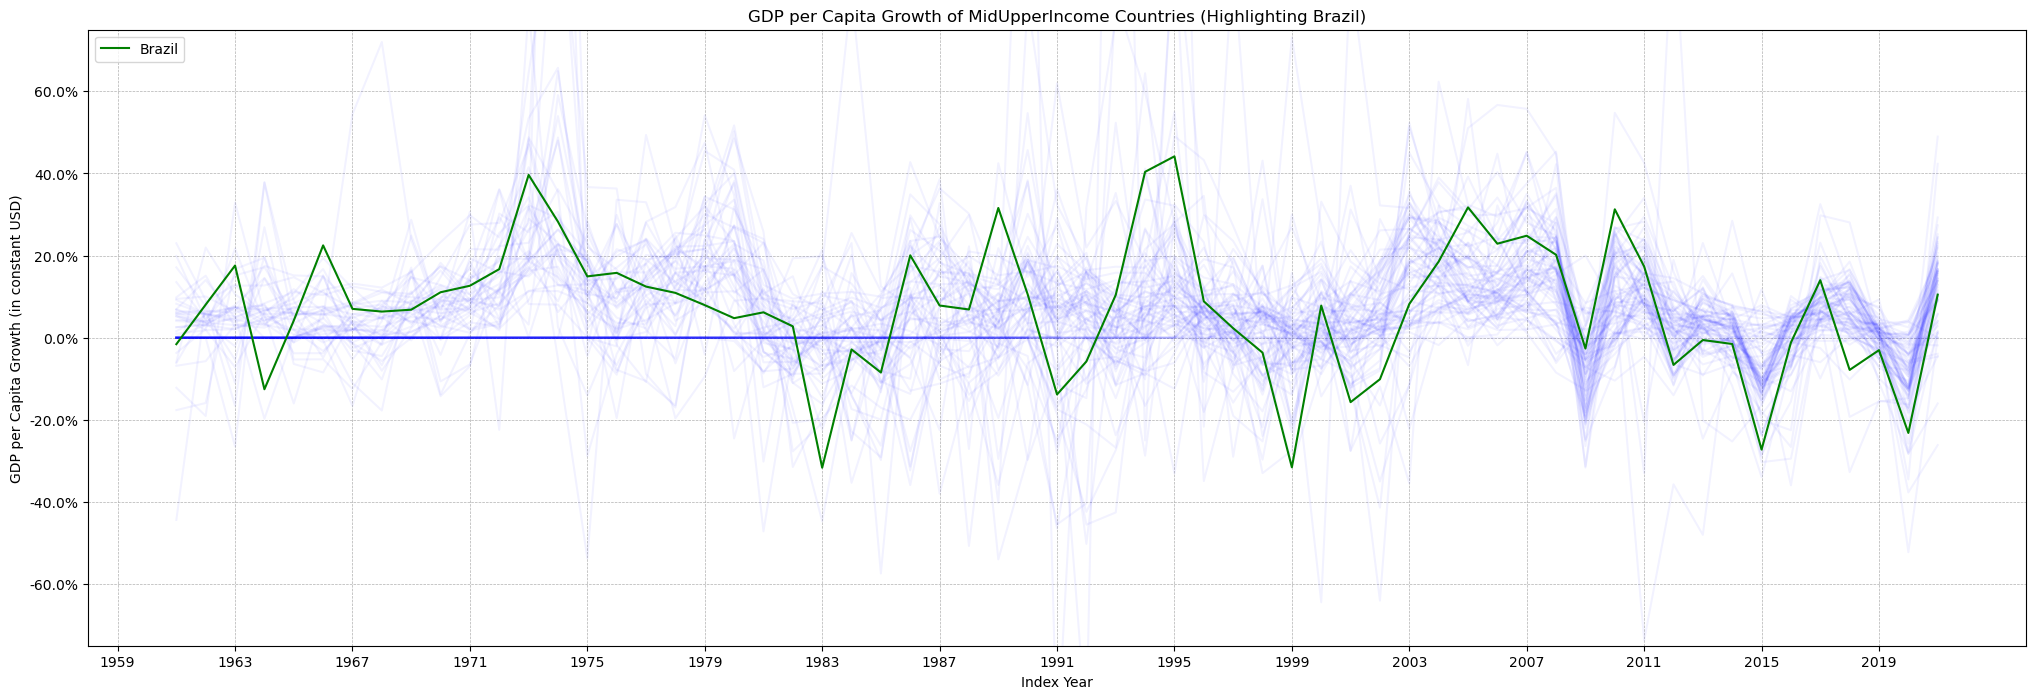

In [11]:
plt.figure(figsize=(25, 8))

# Highlighting Brazil from other countries
df_MidUpperIncome['highlight'] = df_MidUpperIncome['Country Name'] == 'Brazil'


for country in df_MidUpperIncome['Country Name'].unique():
    if country != 'Brazil':
        sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_MidUpperIncome[df_MidUpperIncome['Country Name'] == country], 
                     color='blue', alpha=0.05, legend=False)

# Make Brazil's line more visible
sns.lineplot(x='Index Year', y='GDP_perCapita_growth', data=df_MidUpperIncome[df_MidUpperIncome['Country Name'] == 'Brazil'], 
             color='Green', label='Brazil')

# Setting the x-axis division to be every 4 years
start_year = df_MidUpperIncome['Index Year'].min()
end_year = df_MidUpperIncome['Index Year'].max()
plt.xticks(np.arange(start_year-2, end_year + 1, 4))


# Add percentage styling to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('GDP per Capita Growth of MidUpperIncome Countries (Highlighting Brazil)')
plt.ylabel('GDP per Capita Growth (in constant USD)')
plt.xlabel('Index Year')
plt.ylim(-0.75,0.75)
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
